# Importing Libraries

In [15]:
import pandas as pd
import numpy as np
import sweetviz
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report , confusion_matrix

In [9]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [49]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
                       skiprows = 1 , header = None)
test_set.head()                       

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [12]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
             'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
             'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [14]:
train_set.columns = col_labels

In [50]:
test_set.columns = col_labels

In [21]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
print('Train Data - rows:' , train_set.shape[0],'columns:', train_set.shape[1])
print('-----------------------------------------------------------')
print('Test Data - rows:' , test_set.shape[0],'columns:', test_set.shape[1])

Train Data - rows: 32561 columns: 15
-----------------------------------------------------------
Test Data - rows: 16281 columns: 15


# Checking Percentage of missing data

In [19]:
total = train_set.isnull().sum().sort_values(ascending = False)
percent = (train_set.isnull().sum()/train_set.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,wage_class,native_country,hours_per_week,capital_loss,capital_gain,sex,race,relationship,occupation,marital_status,education_num,education,fnlwgt,workclass,age
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# training data is clean

In [20]:
# Checking missing data in the test dataset
print("There is {} missing values in the dataframe".format(test_set.isnull().sum().sum()))

There is 0 missing values in the dataframe


In [ ]:
# test dataset is also clean

# EDA with Sweetviz

In [ ]:
result = sweetviz.analyze([train_set,"TrainData"], target_feat = 'wage_class')

In [34]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [35]:
# Comparing datatypes of both training and test data
pd.train_set.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

In [ ]:
# Data Cleaning

In [36]:
# if you want to operate on multiple columns, put them in a list like so:
cols = train_set.columns

# pass them to train_set.replace(), specifying each char and it's replacement:
train_set[cols] = train_set[cols].replace({'\$': '', ',': '','<':'','=':'','K':''}, regex=True)


In [37]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,50
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,50
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,50
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,50
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,50


In [51]:
test_set2 = test_set.copy()

In [66]:
test_set = test_set2.copy()

In [70]:
# if you want to operate on multiple columns, put them in a list like so:
cols2 = test_set.columns

# pass them to train_set.replace(), specifying each char and it's replacement:
test_set[cols2] = test_set[cols2].replace({'\$':'', ',': '','<':'','=':'','K.':''
                                          ,'>':''}, regex=True)


In [71]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,50
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,50
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,50
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,50
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,50


In [ ]:
# Histogram for age

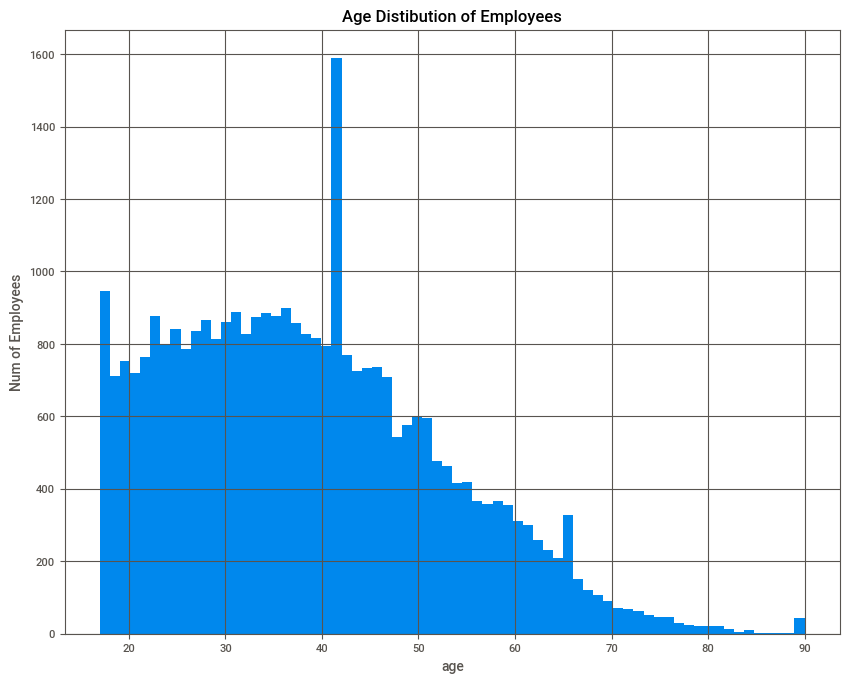

In [72]:
plt.figure(figsize=(10,8))
train_set['age'].hist(bins=70)
plt.title("Age Distibution of Employees")
plt.xlabel("age")
plt.ylabel("Num of Employees")
plt.show()

# Observation : Age of employees is rightly skewed and we also have some outliers

In [ ]:
# Exploring further Age Distibution

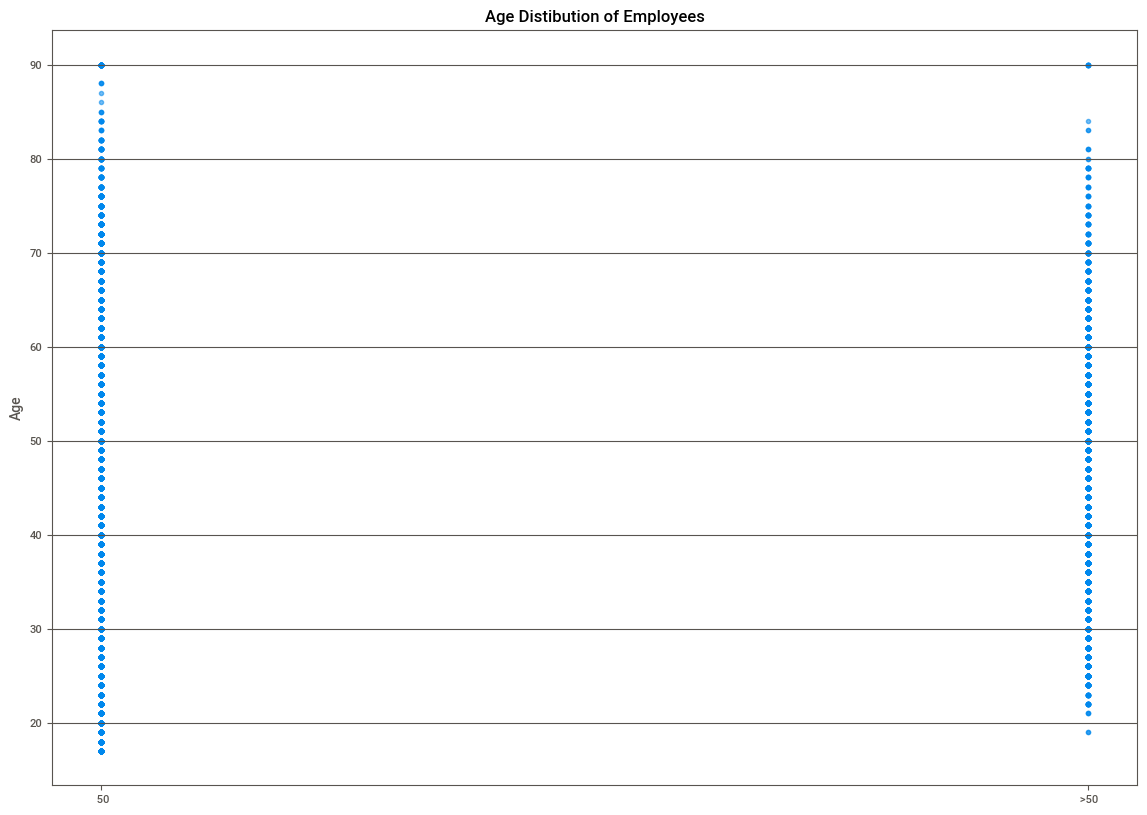

In [74]:
plt.figure(figsize=(14,10))
plt.scatter(train_set['wage_class'], train_set['age'] , alpha=.55)
plt.title("Age Distibution of Employees")
# plt.xlabel("age")
plt.ylabel("Age")
plt.grid(b=True , which = 'major', axis='y')
plt.show()

In [ ]:
# Explore the Education columns

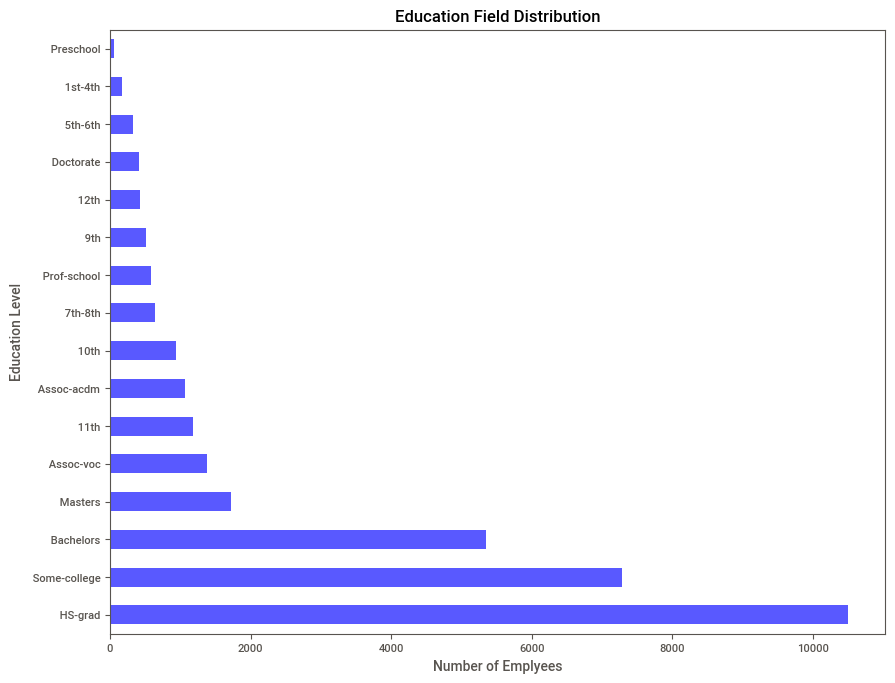

In [94]:
plt.figure(figsize=(10,8))
train_set['education'].value_counts().plot(kind='barh', color='blue',alpha=.65)
plt.title("Education Field Distribution")
plt.xlabel("Number of Emplyees")
plt.ylabel("Education Level")
plt.show()

# Explore data for Marital Status

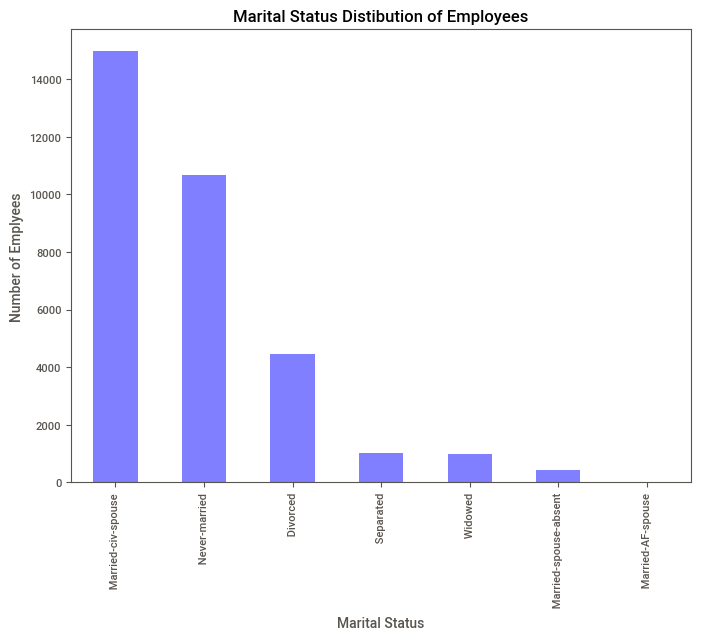

In [93]:
plt.figure(figsize=(8,6))
train_set['marital_status'].value_counts().plot(kind='bar', color='blue' , alpha=.5)
# plt.plot(kind='bar', color='b', alpha=.5)
plt.title("Marital Status Distibution of Employees")
plt.xlabel("Marital Status")
plt.ylabel("Number of Emplyees")
plt.show()